# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading and Studying the First Dataset

In [2]:
data = pd.read_csv("breast_cancer_data.csv")

In [3]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [5]:
data.shape

(569, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


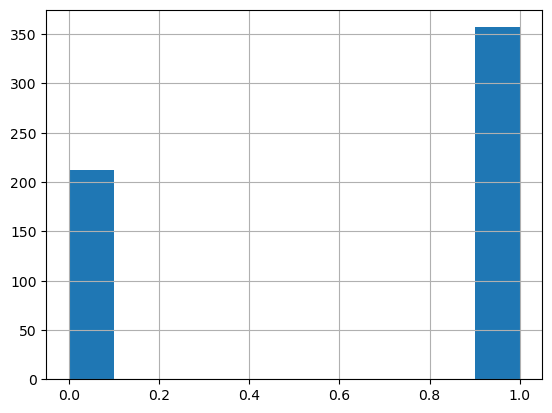

In [7]:
data['diagnosis'].hist()
plt.show()

In [8]:
data['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [9]:
# High correlation of mean radius with mean area and mean perimeter so both can be dropped
data = data[["mean_radius", "mean_texture", "mean_smoothness", "diagnosis"]]
data.head()

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0


# X and y matrix

In [10]:
feature_columns = ['mean_radius','mean_texture','mean_smoothness']
X = data[feature_columns].values
y = data['diagnosis'].values

# Splitting into train and test datasets

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Naives Bayes Classifier

### Instantiating and fitting the model

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb  = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

### Evaluating the model

In [13]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,recall_score
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 92.11%


In [14]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.9403973509933775


In [15]:
print(confusion_matrix(y_test, y_pred))

[[34  5]
 [ 4 71]]


In [16]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.9466666666666667


### Predicting the result

In [17]:
data.sample(1)

,mean_radius,mean_texture,mean_smoothness,diagnosis
104,10.49,19.29,0.09989,1


In [18]:
gnb.predict([[14.58,21.53,0.1054]])

array([0], dtype=int64)

# Logistic regreesion

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train,y_train)

LogisticRegression()

In [22]:
# test 
y_pred = model.predict(X_test)

In [23]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score

In [25]:
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy Score: 91.23%


In [26]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.9324324324324325


In [27]:
print(confusion_matrix(y_test, y_pred))

[[35  4]
 [ 6 69]]


In [28]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.92


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
X_train.shape, X_test.shape

((455, 3), (114, 3))

# Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# SVM

In [32]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf',gamma = 0.1)
model.fit(X_train,y_train)

SVC(gamma=0.1)

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1], dtype=int64)

# GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param = {
    'kernel': ['linear','poly','rbf'],
    'C':[0.01,0.1,1,10],
    'gamma':[0.01,0.1,1,10]
}

In [37]:
model = SVC() # with no Param

In [38]:
grid_search = GridSearchCV(model,param)

In [39]:
grid_search

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']})

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
best_est = SVC(C=0.01, gamma=0.01, kernel='linear')
best_est.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,recall_score

In [ ]:
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

In [44]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.9343065693430657


In [45]:
print(confusion_matrix(y_test, y_pred))

[[41  6]
 [ 3 64]]


In [46]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.9552238805970149


# GUI

In [ ]:
import pickle
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split

# مثال لتحميل البيانات وتدريب النموذج (استبدل هذا ببياناتك الحقيقية)
data = pd.read_csv('breast_cancer_data.csv')
#mean_radius	mean_texture	mean_smoothness	diagnosis
X = data[['mean_radius', 'mean_texture', 'mean_smoothness']]
y = data['diagnosis']  # افترض أن 0 = حميد، 1 = خبيث

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = SVC()  # أو LogisticRegression()
model.fit(X_train, y_train)

# حفظ النموذج في ملف
with open('breast_cancer_model.pkl', 'wb') as file:
    pickle.dump(model, file)
import tkinter as tk
from tkinter import ttk, messagebox
import pickle
import numpy as np

class CancerDiagnosisApp:
    def __init__(self, root):
        self.root = root
        self.root.title("تشخيص الورم - Breast Cancer Diagnosis")
        self.root.geometry("500x400")
        
        # تحميل النموذج الخاص بك
        try:
            with open('breast_cancer_model.pkl', 'rb') as file:
                self.model = pickle.load(file)
        except Exception as e:
            messagebox.showerror("خطأ", f"لا يمكن تحميل النموذج: {str(e)}")
            self.root.destroy()
        
        self.create_widgets()
    
    def create_widgets(self):
        # تخصيص الواجهة
        self.font = ("Arial", 12)
        self.title_font = ("Arial", 14, "bold")
        
        title_label = tk.Label(self.root, text="Breast Cancer Diagnosis", 
                             font=self.title_font, pady=10)
        title_label.pack()
        
        input_frame = ttk.Frame(self.root)
        input_frame.pack(pady=20, padx=20, fill=tk.X)
        
        # حقول الإدخال المطلوبة لنموذجك
        features = [
            ("mean_radius", "mean_radius:"),
            ("mean_texture", "mean_texture:"),
            ("mean_smoothness", "mean_smoothness:")
        ]
        
        self.entries = {}
        for i, (feature, label) in enumerate(features):
            tk.Label(input_frame, text=label, font=self.font).grid(row=i, column=0, sticky='w', pady=5)
            entry = ttk.Entry(input_frame, font=self.font)
            entry.grid(row=i, column=1, sticky='ew', pady=5)
            self.entries[feature] = entry
        
        diagnose_btn = ttk.Button(self.root, text="diagnose", command=self.diagnose)
        diagnose_btn.pack(pady=20)
        
        self.result_label = tk.Label(self.root, text="", font=self.title_font)
        self.result_label.pack(pady=20)
    
    def diagnose(self):
        try:
            # جمع القيم المدخلة حسب ترتيب النموذج
            input_data = []
            for feature in ['mean_radius', 'mean_texture', 'mean_smoothness']:
                value = float(self.entries[feature].get())
                input_data.append(value)
            
            # تحويل إلى مصفوفة numpy كما يتوقع النموذج
            input_array = np.array([input_data])
            
            # التنبؤ باستخدام النموذج الخاص بك
            prediction = self.model.predict(input_array)
            
            # عرض النتيجة (تعديل حسب ترميزك)
            if prediction[0] == 0:
                result = "result:Benign (Benign)"
                color = 'green'
            else:
                result = "result:Malignant (Malignant)"
                color = 'red'
            
            self.result_label.config(text=result, fg=color)
            
        except ValueError:
            messagebox.showerror("خطأ", "الرجاء إدخال قيم رقمية صحيحة")
        except Exception as e:
            messagebox.showerror("خطأ", f"حدث خطأ: {str(e)}")

if __name__ == "__main__":
    root = tk.Tk()
    app = CancerDiagnosisApp(root)
    root.mainloop()

# Loading and Studying the second Dataset

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
sns.countplot(x= 'diagnosis',data =df)
plt.show()

In [ ]:
df.info()

In [ ]:
df = df[["radius_mean", "texture_mean", "smoothness_mean", "diagnosis"]]
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
feature_columns = ['radius_mean','texture_mean','smoothness_mean']
X = df[feature_columns].values
y = df['diagnosis'].values

# Naives Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb  = GaussianNB()
gnb.fit(X_train,y_train)

In [ ]:
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score, recall_score
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

In [ ]:
print("F1 Score: ",f1_score(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Recall:", recall_score(y_test, y_pred))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,recall_score

In [ ]:
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

In [ ]:
print("F1 Score: ",f1_score(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Recall:", recall_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf',gamma = 0.1)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {
    'kernel': ['linear','poly','rbf'],
    'C':[0.01,0.1,1,10],
    'gamma':[0.01,0.1,1,10]
}

In [ ]:
model = SVC() # with no Param

In [ ]:
grid_search = GridSearchCV(model,param)

In [ ]:
grid_search

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
best_est = SVC(C=0.01, gamma=0.01, kernel='linear')
best_est.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,recall_score

In [ ]:
print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test,y_pred)*100))

In [ ]:
print("F1 Score: ",f1_score(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Recall:", recall_score(y_test, y_pred))

# GUI with best recall

In [ ]:
import tkinter as tk
from tkinter import ttk

def create_gui():
    # إنشاء النافذة الرئيسية
    root = tk.Tk()
    root.title("the best model")
    root.geometry("600x400")
    
    # إضافة عنوان
    title_label = tk.Label(root, text="the best model", font=("Arial", 16, "bold"))
    title_label.pack(pady=20)
    
    # إنشاء إطار لعرض النتائج
    frame = ttk.Frame(root, padding="20")
    frame.pack(expand=True, fill=tk.BOTH)
    
    # نتائج مجموعة البيانات الأولى
    dataset1_label = tk.Label(frame, text="in the first dataset:", font=("Arial", 12, "bold"))
    dataset1_label.grid(row=0, column=0, sticky="w", pady=10)
    
    model1_text = "the best model is: SVM\nRecall: 0.955"
    model1_label = tk.Label(frame, text=model1_text, font=("Arial", 12), justify=tk.LEFT)
    model1_label.grid(row=1, column=0, sticky="w", padx=20)
    
    # نتائج مجموعة البيانات الثانية
    dataset2_label = tk.Label(frame, text="in the second dataset:", font=("Arial", 12, "bold"))
    dataset2_label.grid(row=2, column=0, sticky="w", pady=10)
    
    model2_text = "the best midel is: Logistic Regression\nRecall: 0.8947"
    model2_label = tk.Label(frame, text=model2_text, font=("Arial", 12), justify=tk.LEFT)
    model2_label.grid(row=3, column=0, sticky="w", padx=20)
    
    # إضافة صورة أو أيقونة (اختياري)
    # يمكنك إضافة صورة إذا كنت ترغب في ذلك
    
    # إضافة زر للإغلاق
    close_button = ttk.Button(root, text="إغلاق", command=root.destroy)
    close_button.pack(pady=20)
    
    # تشغيل النافذة
    root.mainloop()

if __name__ == "__main__":
    create_gui()